In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

## Expression_model

In [2]:
print("current file path")
!pwd

current file path
/home/munj/PDTC_drug_response/notebook


In [3]:
FILE_EXP_MODEL = '/home/munj/PDTC_drug_response/data/ExpressionModels.txt'
exp_model = pd.read_csv(FILE_EXP_MODEL, sep = "\t",  engine='python', encoding = "cp949")

In [4]:
exp_model

,Gene,AB521M,AB551,AB555,AB559,AB580,AB630,HCI001,HCI002,HCI004,...,VHIO093,VHIO094,VHIO098,VHIO102,VHIO124,VHIO131,VHIO161,VHIO169,VHIO179,VHIO244
0,A1BG,5.862411,5.830705,5.989007,5.953126,5.928351,5.805396,5.832760,5.853901,5.914747,...,5.920899,5.946031,5.991543,5.963415,5.906520,5.801763,5.650367,5.928900,5.836068,5.947546
1,A1CF,5.818102,5.965247,5.908758,6.009367,6.063145,5.971214,5.959154,5.981456,6.020824,...,6.050295,6.189876,5.911639,6.106412,6.055783,5.931639,5.920759,5.986799,5.919454,5.891224
2,A2LD1,7.686080,6.931300,7.036796,7.170089,6.207774,6.137310,6.837106,7.001998,5.887819,...,6.055414,7.046156,6.003391,7.146546,7.054731,6.281433,6.819061,6.655561,7.129801,6.350722
3,A2M,5.572038,5.751998,5.588598,10.122724,5.522242,5.480885,5.638006,5.591973,5.586169,...,8.573449,6.158477,5.694980,7.613703,11.584175,5.582783,10.508739,7.829770,6.345719,5.600972
4,A3GALT2,5.872681,5.856632,5.965087,5.837339,5.826634,6.036293,5.766677,5.937726,5.845250,...,5.784855,5.947274,5.934774,5.720275,5.783759,5.609380,5.630920,5.767358,5.910645,5.886496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22039,psiTPTE22,5.784808,5.846993,5.798300,5.647904,5.689820,5.730081,5.905911,5.809966,5.780053,...,5.860380,5.697138,5.827839,5.802162,6.021138,5.741574,5.687973,5.740140,5.807409,5.804146
22040,tMDC,5.798872,5.898865,5.913737,5.706449,5.832768,5.730300,5.867287,5.952850,5.832219,...,5.808598,5.749001,5.835427,5.866025,5.934945,5.755698,5.735379,5.825897,5.824539,5.725301
22041,tMDC II,5.672012,5.667506,5.711608,5.656925,5.672231,5.487562,5.658975,5.585195,5.541578,...,5.558933,5.580006,5.709199,5.607151,5.693970,5.818198,5.505247,5.639922,5.649558,5.612449
22042,truncated AKR,5.777028,5.759251,5.839494,5.635601,5.700774,5.773772,5.904462,5.741176,5.757932,...,5.768741,5.632052,5.814173,5.884265,5.732746,5.706359,5.812345,5.764019,5.788334,5.705332


In [5]:
exp_model.index = exp_model['Gene']

In [6]:
exp_model = exp_model.drop(['Gene'],axis=1)

In [7]:
exp_model

,AB521M,AB551,AB555,AB559,AB580,AB630,HCI001,HCI002,HCI004,HCI005,...,VHIO093,VHIO094,VHIO098,VHIO102,VHIO124,VHIO131,VHIO161,VHIO169,VHIO179,VHIO244
Gene,,,,,,,,,,,,,,,,,,,,,
A1BG,5.862411,5.830705,5.989007,5.953126,5.928351,5.805396,5.832760,5.853901,5.914747,5.931876,...,5.920899,5.946031,5.991543,5.963415,5.906520,5.801763,5.650367,5.928900,5.836068,5.947546
A1CF,5.818102,5.965247,5.908758,6.009367,6.063145,5.971214,5.959154,5.981456,6.020824,5.900427,...,6.050295,6.189876,5.911639,6.106412,6.055783,5.931639,5.920759,5.986799,5.919454,5.891224
A2LD1,7.686080,6.931300,7.036796,7.170089,6.207774,6.137310,6.837106,7.001998,5.887819,7.343880,...,6.055414,7.046156,6.003391,7.146546,7.054731,6.281433,6.819061,6.655561,7.129801,6.350722
A2M,5.572038,5.751998,5.588598,10.122724,5.522242,5.480885,5.638006,5.591973,5.586169,6.466698,...,8.573449,6.158477,5.694980,7.613703,11.584175,5.582783,10.508739,7.829770,6.345719,5.600972
A3GALT2,5.872681,5.856632,5.965087,5.837339,5.826634,6.036293,5.766677,5.937726,5.845250,5.847828,...,5.784855,5.947274,5.934774,5.720275,5.783759,5.609380,5.630920,5.767358,5.910645,5.886496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
psiTPTE22,5.784808,5.846993,5.798300,5.647904,5.689820,5.730081,5.905911,5.809966,5.780053,5.828249,...,5.860380,5.697138,5.827839,5.802162,6.021138,5.741574,5.687973,5.740140,5.807409,5.804146
tMDC,5.798872,5.898865,5.913737,5.706449,5.832768,5.730300,5.867287,5.952850,5.832219,6.020961,...,5.808598,5.749001,5.835427,5.866025,5.934945,5.755698,5.735379,5.825897,5.824539,5.725301
tMDC II,5.672012,5.667506,5.711608,5.656925,5.672231,5.487562,5.658975,5.585195,5.541578,5.627741,...,5.558933,5.580006,5.709199,5.607151,5.693970,5.818198,5.505247,5.639922,5.649558,5.612449


In [8]:
print("The number of model is",len(set(exp_model.columns)))

The number of model is 39


## Cancer Cell Line

## L1000

In [9]:
FILE_L1000_PATH =  '/home/munj/PDTC_drug_response/data/landmark.txt'
l1000 = pd.read_csv(FILE_L1000_PATH, sep = "\t",  engine='python', encoding = "cp949")

In [10]:
l1000

,Entrez ID,Symbol,Name,Gene Family,Type,RNA-Seq Correlation,RNA-Seq Correlation Self-Rank
0,3638,INSIG1,insulin induced gene 1,NaN,landmark,NaN,NaN
1,2309,FOXO3,forkhead box O3,Forkhead boxes,landmark,NaN,NaN
2,1001,CDH3,cadherin 3,Type I classical cadherins,landmark,NaN,NaN
3,4998,ORC1,origin recognition complex subunit 1,"AAA ATPases, Origin recognition complex",landmark,NaN,NaN
4,3682,ITGAE,integrin subunit alpha E,"CD molecules, Integrin alpha subunits",landmark,NaN,NaN
...,...,...,...,...,...,...,...
973,4925,NUCB2,nucleobindin 2,EF-hand domain containing,landmark,NaN,NaN
974,4927,NUP88,nucleoporin 88,Nucleoporins,landmark,NaN,NaN
975,4931,NVL,nuclear VCP-like,AAA ATPases,landmark,NaN,NaN
976,3611,ILK,integrin linked kinase,Ankyrin repeat domain containing,landmark,NaN,NaN


In [11]:
l1000_symbol = l1000['Symbol']

In [12]:
l1000_symbol

0      INSIG1
1       FOXO3
2        CDH3
3        ORC1
4       ITGAE
        ...  
973     NUCB2
974     NUP88
975       NVL
976       ILK
977     INPP1
Name: Symbol, Length: 978, dtype: object

### Extracting

In [13]:
exp_model[exp_model.index.isin(l1000_symbol)]

,AB521M,AB551,AB555,AB559,AB580,AB630,HCI001,HCI002,HCI004,HCI005,...,VHIO093,VHIO094,VHIO098,VHIO102,VHIO124,VHIO131,VHIO161,VHIO169,VHIO179,VHIO244
Gene,,,,,,,,,,,,,,,,,,,,,
AARS,11.572945,11.739381,11.102309,11.687228,10.600569,11.254383,11.766282,11.683769,10.956917,11.284298,...,11.760344,11.867325,11.318257,11.189369,10.729305,11.372902,11.495970,11.265719,11.629401,11.919546
ABCB6,8.273881,8.638622,8.652319,7.640081,7.890986,8.248045,8.105783,9.148884,8.062214,7.994658,...,8.743297,8.011800,7.956749,8.671405,8.608872,8.779828,7.455496,7.534076,7.765503,8.747047
ABCC5,8.271790,7.089986,8.082755,7.838332,8.115847,7.674803,7.789413,8.057959,8.230096,8.497284,...,7.498959,8.122700,8.236055,9.666122,8.751318,7.046348,8.259153,6.749037,7.248662,8.158929
ABCF1,10.229753,10.638183,9.795135,10.338263,10.516700,10.620159,10.889811,10.570613,10.661625,10.460659,...,10.852851,10.450878,10.402415,11.424537,9.528809,9.661326,10.108420,10.066931,10.157420,10.644467
ABCF3,7.275604,7.220047,6.973575,6.476633,7.245739,6.586840,7.143400,6.782475,7.255107,7.479000,...,7.290887,7.263974,7.974045,7.677989,6.351502,6.817870,6.840480,6.168243,6.745909,7.184499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF318,8.027612,7.567715,8.214453,8.532068,7.975235,8.249520,7.658784,7.301058,7.866953,7.111004,...,7.723956,6.861867,7.078906,8.499710,7.119123,7.629384,7.135090,8.251622,7.418903,7.875552
ZNF451,6.812736,6.755735,7.583934,7.558493,7.163236,7.523582,6.900151,6.848396,7.695483,7.330233,...,7.185769,6.369880,6.386381,8.209993,8.023551,6.871884,6.656509,7.278064,6.775940,7.347178
ZNF586,7.853702,8.065385,7.388413,7.471373,8.041306,7.728232,8.289940,8.532083,8.060971,8.736690,...,7.485713,8.050269,7.988364,7.677434,7.738277,8.150139,8.106780,7.935800,7.849696,8.044430


# PCA visualization

## Drug response

In [52]:
drug_res_model = pd.read_csv('/home/munj/PDTC_drug_response/data/DrugResponsesAUCModels.txt', sep = "\t",  engine='python', encoding = "cp949")

In [53]:
drug_res_model

,Model,Drug,AUC,iC50,D1_CONC,D5_CONC,perc.iC50
0,HCI001,(5Z)-7-Oxozeaenol,0.217813,5.48327034751385,7.701322,2.337740,71.507443
1,HCI001,17-AAG,0.301919,18349.7411361244,1.000000,0.003906,183.038003
2,HCI001,5-Fluorouracil,0.494210,1.3502642314527,20.000000,0.078125,51.391421
3,HCI001,681640,0.102932,152.12579956481,2.000000,0.007812,150.681089
4,HCI001,ABT-263,0.497307,0.124656353895025,2.000000,0.007812,49.591347
...,...,...,...,...,...,...,...
1631,VHIO244,Vorinostat,0.560835,0.478323131822251,10.000000,0.039062,44.636232
1632,VHIO244,XAV 939,0.080441,103327.052987666,5.581430,1.175631,702.942004
1633,VHIO244,YK 4-279,0.216032,8.69091078926115,7.701322,2.337740,79.903643
1634,VHIO244,ZM-447439,0.127893,1493729.57804505,3.275568,0.740057,587.743723


In [57]:
drug_res_model.groupby('Drug').size()

Drug
(5Z)-7-Oxozeaenol    15
17-AAG               20
5-Fluorouracil       15
681640               20
ABT-263              20
                     ..
Vorinostat           20
XAV 939              15
YK 4-279             15
ZM-447439            20
mirin                10
Length: 104, dtype: int64

In [63]:
drug_res_model[drug_res_model['Drug']=='mirin']

,Model,Drug,AUC,iC50,D1_CONC,D5_CONC,perc.iC50
174,HCI002,mirin,0.210915,33.2316755366236,100.0,0.390625,80.132887
452,HCI010,mirin,0.453856,10.2016359788931,100.0,0.390625,56.665625
808,STG143,mirin,0.083395,181755084084.959,100.0,0.390625,484.491857
910,STG195,mirin,0.407380,9.99717249289782,100.0,0.390625,58.470799
1095,STG282,mirin,0.284828,127.010609221109,100.0,0.390625,84.645822
1187,STG316,mirin,0.153136,164.861397395556,100.0,0.390625,109.015670
1289,STG335,mirin,0.457137,8.18335409062761,100.0,0.390625,54.860451
1441,VHIO169,mirin,0.203885,35.9313146331816,100.0,0.390625,80.132887
1533,VHIO179,mirin,0.134124,669.483491254295,100.0,0.390625,134.288106
1635,VHIO244,mirin,0.245509,39.4077095447554,100.0,0.390625,80.132887


In [64]:
drug_res_model[drug_res_model['Drug']=='mirin']['Model'].isin(exp_model.columns[exp_model.isnull().any()==False]).all()

False

In [69]:
exp_model.columns[exp_model.isnull().any()==False]

Index(['AB521M', 'AB551', 'AB555', 'AB559', 'AB580', 'AB630', 'HCI004',
       'HCI005', 'HCI006', 'HCI010', 'HCI011', 'HCI014', 'IC006', 'IC007',
       'STG143', 'STG195', 'STG282', 'STG316', 'STG335', 'VHIO006', 'VHIO039',
       'VHIO089', 'VHIO094', 'VHIO098', 'VHIO102', 'VHIO124', 'VHIO131',
       'VHIO161', 'VHIO169', 'VHIO179', 'VHIO244'],
      dtype='object')

In [70]:
'AB521M' in exp_model.columns[exp_model.isnull().any()==False]

True

In [72]:
#drug that deosn't contain nan value
number_model_w_o_nan = {}
for i in set(drug_res_model['Drug']):
    k = 0
    for j in drug_res_model[drug_res_model['Drug']==i]['Model']:
        if j in exp_model.columns[exp_model.isnull().any()==False]:
            k = k+1
    number_model_w_o_nan[i] = k
            
    

In [85]:
number_model_w_o_nan

{'AICAR': 13,
 'BX-795': 13,
 'RI-1': 5,
 'PLX4720': 13,
 'Vorinostat': 13,
 'AKT inhibitor VIII': 9,
 'Cyclophosphamide': 9,
 'GW843682X (AN-13)': 9,
 'PF-4708671': 13,
 'MK-2206': 13,
 'NVP-AUY922': 5,
 'Anastrozole': 9,
 'JQ1': 13,
 'CHIR-99021': 13,
 'BMS-536924': 13,
 'GSK1904529A': 9,
 'PD-0332991': 13,
 'SB-505124': 13,
 'Bortezomib': 5,
 'Bryostatin': 0,
 'Paclitaxel': 9,
 'INCB-18424': 9,
 'Lenalidomide': 13,
 'Camptothecin': 13,
 'PF-02341066': 13,
 'GW 441756': 13,
 'BMS-345541': 9,
 'GDC-0449': 9,
 'EPZ004777': 5,
 'Everolimus': 9,
 'JNK Inhibitor VIII': 13,
 'AZ960': 9,
 'AG-014699': 9,
 '681640': 13,
 'PAC-1': 9,
 'MLN8237': 5,
 'XAV 939': 9,
 'BIBW2992': 13,
 'AZD6482': 13,
 'TW 37': 9,
 'Nutlin-3a': 13,
 'BMS-708163': 13,
 'Vinblastine': 13,
 'BIRB 0796': 13,
 'BI-D1870': 5,
 'mirin': 9,
 'AZD8931': 5,
 'PF477736': 9,
 'BYL719': 5,
 'AZD7762': 9,
 'Gefitinib': 13,
 'JNJ-26854165': 9,
 'Tamoxifen': 13,
 'SCH772984': 5,
 'Embelin': 9,
 'RO-3306': 13,
 'Nilotinib': 13,
 'G

In [87]:
drug_res_model[drug_res_model['Drug']=='AICAR']

,Model,Drug,AUC,iC50,D1_CONC,D5_CONC,perc.iC50
88,HCI002,AICAR,0.218715,1220.61133576083,1674.576271,6.541314,94.297598
178,HCI005,AICAR,0.157718,1491.15655209923,1674.576271,6.541314,97.907946
228,HCI008,AICAR,0.216823,548.016998871992,1674.576271,6.541314,79.856206
281,HCI009,AICAR,0.119187,5877.96842883645,1674.576271,6.541314,119.570033
367,HCI010,AICAR,0.415311,190.496438272064,1674.576271,6.541314,59.999292
456,HCI011,AICAR,0.122676,4057.44323158827,1674.576271,6.541314,115.959685
506,IC007,AICAR,0.175666,999.151987690618,1674.576271,6.541314,90.687250
723,STG143,AICAR,0.056803,66910.4950912864,1674.576271,6.541314,166.504557
815,STG195,AICAR,0.067968,30040.7571506863,1674.576271,6.541314,152.063165
999,STG282,AICAR,0.167533,2755402889.18114,1674.576271,6.541314,172.822665


## PCA

In [14]:
exp_model

,AB521M,AB551,AB555,AB559,AB580,AB630,HCI001,HCI002,HCI004,HCI005,...,VHIO093,VHIO094,VHIO098,VHIO102,VHIO124,VHIO131,VHIO161,VHIO169,VHIO179,VHIO244
Gene,,,,,,,,,,,,,,,,,,,,,
A1BG,5.862411,5.830705,5.989007,5.953126,5.928351,5.805396,5.832760,5.853901,5.914747,5.931876,...,5.920899,5.946031,5.991543,5.963415,5.906520,5.801763,5.650367,5.928900,5.836068,5.947546
A1CF,5.818102,5.965247,5.908758,6.009367,6.063145,5.971214,5.959154,5.981456,6.020824,5.900427,...,6.050295,6.189876,5.911639,6.106412,6.055783,5.931639,5.920759,5.986799,5.919454,5.891224
A2LD1,7.686080,6.931300,7.036796,7.170089,6.207774,6.137310,6.837106,7.001998,5.887819,7.343880,...,6.055414,7.046156,6.003391,7.146546,7.054731,6.281433,6.819061,6.655561,7.129801,6.350722
A2M,5.572038,5.751998,5.588598,10.122724,5.522242,5.480885,5.638006,5.591973,5.586169,6.466698,...,8.573449,6.158477,5.694980,7.613703,11.584175,5.582783,10.508739,7.829770,6.345719,5.600972
A3GALT2,5.872681,5.856632,5.965087,5.837339,5.826634,6.036293,5.766677,5.937726,5.845250,5.847828,...,5.784855,5.947274,5.934774,5.720275,5.783759,5.609380,5.630920,5.767358,5.910645,5.886496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
psiTPTE22,5.784808,5.846993,5.798300,5.647904,5.689820,5.730081,5.905911,5.809966,5.780053,5.828249,...,5.860380,5.697138,5.827839,5.802162,6.021138,5.741574,5.687973,5.740140,5.807409,5.804146
tMDC,5.798872,5.898865,5.913737,5.706449,5.832768,5.730300,5.867287,5.952850,5.832219,6.020961,...,5.808598,5.749001,5.835427,5.866025,5.934945,5.755698,5.735379,5.825897,5.824539,5.725301
tMDC II,5.672012,5.667506,5.711608,5.656925,5.672231,5.487562,5.658975,5.585195,5.541578,5.627741,...,5.558933,5.580006,5.709199,5.607151,5.693970,5.818198,5.505247,5.639922,5.649558,5.612449


In [30]:
exp_model.columns[exp_model.isnull().any()] #shit..

Index(['HCI001', 'HCI002', 'HCI008', 'HCI009', 'STG139', 'STG139M', 'STG201',
       'VHIO093'],
      dtype='object')

In [43]:
exp_model.columns[exp_model.isnull().any()==False]

Index(['AB521M', 'AB551', 'AB555', 'AB559', 'AB580', 'AB630', 'HCI004',
       'HCI005', 'HCI006', 'HCI010', 'HCI011', 'HCI014', 'IC006', 'IC007',
       'STG143', 'STG195', 'STG282', 'STG316', 'STG335', 'VHIO006', 'VHIO039',
       'VHIO089', 'VHIO094', 'VHIO098', 'VHIO102', 'VHIO124', 'VHIO131',
       'VHIO161', 'VHIO169', 'VHIO179', 'VHIO244'],
      dtype='object')

In [33]:
x = exp_model.drop([i for i in exp_model.columns[exp_model.isnull().any()]],axis=1).values

In [34]:
x = StandardScaler().fit_transform(x)

In [44]:
pd.DataFrame(x, columns=exp_model.columns[exp_model.isnull().any()==False]).head()

,AB521M,AB551,AB555,AB559,AB580,AB630,HCI004,HCI005,HCI006,HCI010,...,VHIO089,VHIO094,VHIO098,VHIO102,VHIO124,VHIO131,VHIO161,VHIO169,VHIO179,VHIO244
0,-0.727502,-0.745145,-0.627331,-0.664315,-0.670977,-0.768147,-0.703425,-0.686374,-0.768137,-0.756992,...,-0.777122,-0.664033,-0.634183,-0.667062,-0.696980,-0.754836,-0.878317,-0.683939,-0.753895,-0.656494
1,-0.756534,-0.656560,-0.679391,-0.627125,-0.583530,-0.658823,-0.632356,-0.707113,-0.488105,-0.622279,...,-0.661578,-0.506603,-0.686202,-0.571453,-0.597653,-0.671180,-0.701662,-0.645210,-0.698587,-0.693338
2,0.467407,-0.020492,0.052410,0.140409,-0.489701,-0.549317,-0.721466,0.244735,0.635631,-0.212190,...,-0.697247,0.046228,-0.626469,0.123987,0.067098,-0.445870,-0.114778,-0.197875,0.104216,-0.392741
3,-0.917760,-0.796968,-0.887092,2.092855,-0.934440,-0.982096,-0.923563,-0.333700,-0.196591,-0.129766,...,-0.933055,-0.526875,-0.827253,0.436331,3.081220,-0.895886,2.295786,0.587554,-0.415852,-0.883217
4,-0.720773,-0.728074,-0.642849,-0.740880,-0.736966,-0.615917,-0.749986,-0.741798,-0.774317,-0.687411,...,-0.779276,-0.663231,-0.671141,-0.829627,-0.778672,-0.878754,-0.891022,-0.791995,-0.704429,-0.696431


In [48]:
pca = PCA(n_components=2)
printcipalComponents = pca.fit_transform(x.T)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['pc1', 'pc2'])

In [49]:
principalDf

,pc1,pc2
0,-9.418355,2.029168
1,14.450810,-9.867280
2,27.919750,18.172361
3,-22.556041,18.325304
4,20.163587,6.169188
5,-5.858276,45.284838
6,-16.685947,-2.678441
7,13.563871,-16.613543
8,31.711082,5.127060
9,-27.153242,1.998483


In [100]:
AICAR_drug_response = drug_res_model[drug_res_model['Drug']=='AICAR']

In [102]:
AICAR_drug_response_wonan = AICAR_drug_response[AICAR_drug_response['Model'].isin(exp_model.columns[exp_model.isnull().any()==False])==True]

In [103]:
AICAR_drug_response_wonan

,Model,Drug,AUC,iC50,D1_CONC,D5_CONC,perc.iC50
178,HCI005,AICAR,0.157718,1491.15655209923,1674.576271,6.541314,97.907946
367,HCI010,AICAR,0.415311,190.496438272064,1674.576271,6.541314,59.999292
456,HCI011,AICAR,0.122676,4057.44323158827,1674.576271,6.541314,115.959685
506,IC007,AICAR,0.175666,999.151987690618,1674.576271,6.541314,90.687250
723,STG143,AICAR,0.056803,66910.4950912864,1674.576271,6.541314,166.504557
815,STG195,AICAR,0.067968,30040.7571506863,1674.576271,6.541314,152.063165
999,STG282,AICAR,0.167533,2755402889.18114,1674.576271,6.541314,172.822665
1102,STG316,AICAR,0.221975,548.016998871992,1674.576271,6.541314,79.856206
1194,STG335,AICAR,0.260570,4.03227863428901e+25,1674.576271,6.541314,1029.377717
1293,VHIO098,AICAR,0.248236,448.588553677406,1674.576271,6.541314,76.245858


In [111]:
string_list = [i for i in AICAR_drug_response_wonan['Model']]

AB521M
AB551
AB555
AB559
AB580
AB630
HCI004
HCI005
0.157717564183258
HCI006
HCI010
0.41531111327558795
HCI011
0.122675655766856
HCI014
IC006
IC007
0.175666488985261
STG143
0.0568031576706493
STG195
0.0679678995123716
STG282
0.16753290697198098
STG316
0.22197500267685
STG335
0.26057035827438396
VHIO006
VHIO039
VHIO089
VHIO094
VHIO098
0.24823563121849399
VHIO102
VHIO124
VHIO131
VHIO161
VHIO169
0.157254099002573
VHIO179
0.21035697814479395
VHIO244
0.327715638162492


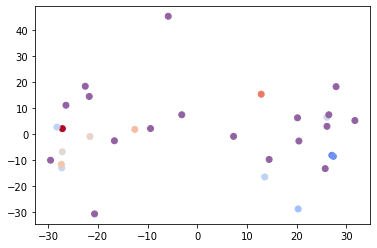

In [128]:
c_list = []
for i in exp_model.columns[exp_model.isnull().any()==False]:
    print(i)
    if i in string_list:
        c_list.append(plt.cm.coolwarm(float(AICAR_drug_response_wonan[AICAR_drug_response_wonan['Model']==i]['AUC'])*2.5) )  
        print(float(AICAR_drug_response_wonan[AICAR_drug_response_wonan['Model']==i]['AUC']))
    else :
        c_list.append(plt.cm.PRGn(0.18))
    
plt.scatter(principalDf['pc1'],principalDf['pc2'],c=c_list)